# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Yandiyan
- **Email:** yandiyan10@gmail.com
- **ID Dicoding:** yandiyannn

## Menentukan Pertanyaan Bisnis

### - Bagaimana pola penggunaan sepeda pada jam sibuk (pagi dan sore) dibandingkan dengan jam-jam lainnya? Faktor apa saja yang mempengaruhi pola tersebut?

> Banyak kota besar di Indonesia mengalami kepadatan lalu lintas pada jam-jam sibuk (06:00–09:00 dan 16:00–19:00). Memahami apakah pola penggunaan sepeda mengikuti tren ini dapat membantu perencanaan transportasi berkelanjutan. Jika terdapat lonjakan penggunaan pada jam-jam tertentu, maka pemerintah atau penyedia layanan sepeda bisa mempertimbangkan penguatan fasilitas (misalnya, jalur sepeda tambahan atau sistem rental yang lebih fleksibel).


### - Bagaimana perbandingan jumlah peminjaman sepeda antara hari kerja dan akhir pekan, serta bagaimana pengaruh kondisi cuaca terhadap pola peminjaman?


> Jika peminjaman lebih tinggi pada akhir pekan, maka layanan penyewaan sepeda bisa lebih menargetkan segmen rekreasi. Jika lebih tinggi pada hari kerja, berarti sepeda lebih digunakan sebagai alat transportasi harian. Di Indonesia, musim hujan dapat sangat mempengaruhi pola transportasi. Jika cuaca buruk mengurangi jumlah peminjaman secara signifikan, maka penyedia layanan atau pemerintah bisa mempertimbangkan solusi seperti tempat parkir sepeda yang lebih terlindungi atau promo khusus saat musim hujan.



## Import Semua Packages/Library yang Digunakan

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

- pandas untuk membaca dan memanipulasi dataset
- numpy untuk operasi numerik
- matplotlib untuk visualisasi
- seaborn untuk mempercantik visualisasi
- datetime untuk format tanggal

In [7]:
#check library
!pip list | grep pandas
!pip list | grep seaborn
!pip list | grep matplotlib
!pip list | grep numpy
!pip list | grep datetime

geopandas                          1.0.1
pandas                             2.2.2
pandas-datareader                  0.10.0
pandas-gbq                         0.28.0
pandas-stubs                       2.2.2.240909
sklearn-pandas                     2.2.0
seaborn                            0.13.2
matplotlib                         3.10.0
matplotlib-inline                  0.1.7
matplotlib-venn                    1.1.2
numpy                              1.26.4


In [12]:
#mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data Wrangling

### Gathering Data

In [13]:
import pandas as pd
path = "/content/drive/My Drive/Submission/data/"

# Load dataset
df_day = pd.read_csv(path + "day.csv")
df_hour = pd.read_csv(path + "hour.csv")

# test show 5 baris pertama
df_day.head()
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [16]:
df_day = pd.read_csv("/content/drive/My Drive/Submission/data/day.csv")
df_hour = pd.read_csv("/content/drive/My Drive/Submission/data/hour.csv")

df_day['dteday'] = pd.to_datetime(df_day['dteday'])
df_hour['dteday'] = pd.to_datetime(df_hour['dteday'])

df_day['dteday'].dtype
df_hour['dteday'].dtype

dtype('<M8[ns]')

In [17]:
# menampilkan informasi dataset
df_day.info()
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**Insight:**
- tidak ada missing values pada dataset
- kolom dteday sudah dalam format datetime
- day.csv (data harian) memiliki 731 baris data selama sekitar 2 tahun dengan jumlah kolom adalah 16.
- hour.csv (data per jam) memiliki 17.379 baris data data selama sekitar 2 tahun dengan jumlah kolom adalah 16 + 1 (hour)
- yr adalah tahun
- mnth adalah bulan
- weekday adalah hari dalam seminggu
- hr adalah jam
- season adalah musim
- holiday adalah hari libur
- working day adalah hari kerja
- weathersit adalah kondisi cuaca
- temp adalah suhu
- atemp adalah suhu
- hum adalah kelembapan
- windspeed adalah kecepatan angin
- casual adalah pengguna yang tidak terdaftar
- registered adalah pengguna yang terdaftar
- cnt adalah total pengguna per hari atau jam

### Assessing Data

In [18]:
#check missing values
print ("jumlah missing values pada hour.csv:")
print (df_hour.isnull().sum())
print ("jumlah missing values pada day.csv:")
print (df_day.isnull().sum())

jumlah missing values pada hour.csv:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
jumlah missing values pada day.csv:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [19]:
#check duplicate data
print ("jumlah duplicate data pada hour.csv:")
print (df_hour.duplicated().sum())
print ("jumlah duplicate data pada day.csv:")
print (df_day.duplicated().sum())

jumlah duplicate data pada hour.csv:
0
jumlah duplicate data pada day.csv:
0


In [20]:
#check distribusi anomali
print ("distribusi anomali pada hour.csv:")
print (df_hour.describe())
print ("distribusi anomali pada day.csv:")
print (df_day.describe())

distribusi anomali pada hour.csv:
          instant                         dteday        season            yr  \
count  17379.0000                          17379  17379.000000  17379.000000   
mean    8690.0000  2012-01-02 04:08:34.552045568      2.501640      0.502561   
min        1.0000            2011-01-01 00:00:00      1.000000      0.000000   
25%     4345.5000            2011-07-04 00:00:00      2.000000      0.000000   
50%     8690.0000            2012-01-02 00:00:00      3.000000      1.000000   
75%    13034.5000            2012-07-02 00:00:00      3.000000      1.000000   
max    17379.0000            2012-12-31 00:00:00      4.000000      1.000000   
std     5017.0295                            NaN      1.106918      0.500008   

               mnth            hr       holiday       weekday    workingday  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       6.537775     11.546752      0.028770      3.003683      0.682721   
min     

**Insight:**
- tidak ada missing values pada kedua dataset
- tidak ada duplikasi data pada kedua dataset
- data sudah dalam kondisi baik untuk dianalisis, sehingga tidak perlu amputasi atau penghapusan data.
- mean peminjaman sepeda per jam adalah 189 unit
- max peminjaman sepeda perjam adalah 977 unit
- min peminjaman dalam seharim adalah 22 unit
- max peminjaman dalam sehari adalah 8714 unit
- namun ada beberapa potensi anomali, yaitu:


> - potensi anomali pada hum dan windspeed (kemungkinan ada kesalatan pencatatan atau nilai default)
- kategori 4 terlalu sedikit atau ada data ekstrim/kontras



### Cleaning Data

In [21]:
#data sudah dalam kondisi baik untuk dianalisis, namun ada beberapa potensi anomali
#tidak perlu penghapusan namun perlu meninjau potensi anomali
#jika kurang dari 5% dari total data maka akan dihapus
#jika jumlahnya lebih dari 5% dari total data maka diganti dengan median atau interpolasi


#check frekuensi hum = 0 dan speed = 0
print("jumlah data dengan `hum = 0.00`:", (df_hour['hum'] == 0.00).sum())
print("jumlah data dengan `windspeed = 0.00`:", (df_hour['windspeed'] == 0.00).sum())

print("\npersentase dari total dataset:")
print("persentase `hum = 0.00`:", (df_hour['hum'] == 0.00).mean() * 100, "%")
print("persentase `windspeed = 0.00`:", (df_hour['windspeed'] == 0.00).mean() * 100, "%")

jumlah data dengan `hum = 0.00`: 22
jumlah data dengan `windspeed = 0.00`: 2180

persentase dari total dataset:
persentase `hum = 0.00`: 0.1265895621151965 %
persentase `windspeed = 0.00`: 12.543874791414927 %


In [24]:
#hum <5% sehingga dihapus
df_hour = df_hour[df_hour['hum'] != 0.00]
#windspeed >5% sehingga diubat menjadi median
median_windspeed = df_hour['windspeed'].median()
df_hour.loc[df_hour['windspeed'] == 0.00, 'windspeed'] = median_windspeed

In [25]:
#check weathersit
print(df_hour['weathersit'].value_counts())

weathersit
1    11413
2     4542
3     1399
4        3
Name: count, dtype: int64


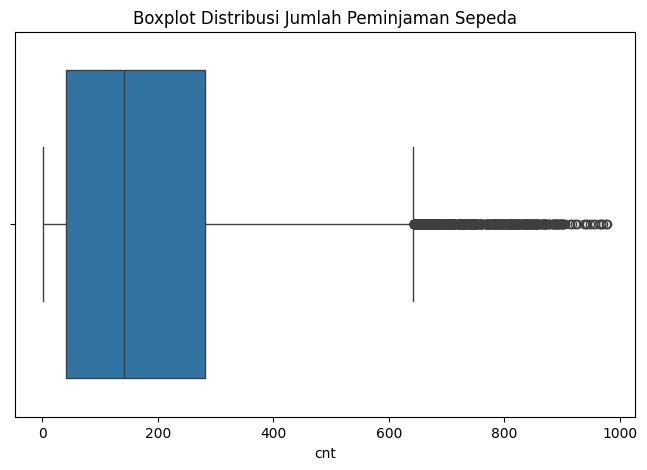

In [26]:
#check distribusi cnt untuk outlier
plt.figure(figsize=(8,5))
sns.boxplot(x=df_hour['cnt'])
plt.title("Boxplot Distribusi Jumlah Peminjaman Sepeda")
plt.show()

In [ ]:
#menghapus kolom instant
df_hour.drop(columns=['instant'], inplace=True)
df_day.drop(columns=['instant'], inplace=True)

           temp     atemp
temp   1.000000  0.987673
atemp  0.987673  1.000000


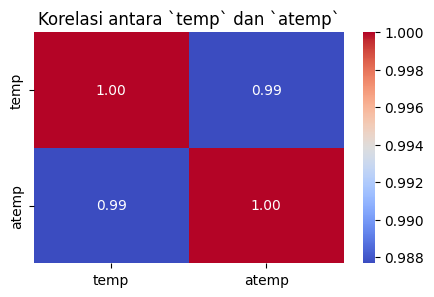

In [29]:
#check korelasi antara temp dan atemp
correlation = df_hour[['temp', 'atemp']].corr()
print(correlation)

# heatmap korelasi
plt.figure(figsize=(5,3))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Korelasi antara `temp` dan `atemp`")
plt.show()

In [30]:
#korelasi antara atemp dan temp mendekati 1 sehingga bisa dihapus
df_hour.drop(columns=['atemp'], inplace=True)

In [32]:
#menyimpan data yang sudah dibersihkan
df_hour.to_csv("/content/drive/My Drive/Submission/data/hour_clean.csv", index=False)
df_day.to_csv("/content/drive/My Drive/Submission/data/day_clean.csv", index=False)

**Insight:**
- karena data sudah dalam kondisi baik, tidak ada imputasi data
- hum yang bernilai 0 dihapus karena <5% dari total data
- windspeed yang bernilai 0 diganti dengan nilai median dari data tersebut karena >5% dari data total
- weathersit tetap dipertahankan. meskipun pada kategori 4 sangat jarang, kategori ini bisa memiliki dampak signifikan pada pola peminjaman
- banyak outlier di atas 600-700 pada cnt namun tetap dibiarkan karena mencerminkan jam-jam sibuk dan relevan dengan analisis.
- menghapus kolom instant karena tidak diperlukan
- menghapus kolom atemp karena memiliki korelasi mendekati 1 dengan temp

### Feature Engineering

Proses menambahkan fitur baru yang dapat membantu menjawab pertanyaan bisnis dengan lebih baik, fitur yang akan ditambahkan adalah
- rush hour vs non-rush hour (menjawab pola penggunaan sepeda pada jam sibuk)
- weekday vs weekend (menjawab pengaruh hari kerja dan akhir pekan terhadap peminjaman sepeda)
- mengubah musim menjadi nama bukan kode (agar lebih mudah dipahami dalam analisis dan visualisasi)
- menambah variabel temp_bins untuk mengelompokkan suhu (mengetahui bagaimana pengaruh suhu terhadap peminjaman sepeda)
- menambahkan cnt_log (transformasi logaritmik untuk mengurangi skewness pada distribusi jumlah peminjaman)

In [33]:
#buat kolom baru untuk kategori jam sibuk
def categorize_rush_hour(hour):
    if 7 <= hour <= 9 or 16 <= hour <= 19:
        return 'Rush Hour'
    else:
        return 'Non-Rush Hour'

# Tambahkan kolom baru 'rush_hour' ke DataFrame
df_hour['rush_hour'] = df_hour['hr'].apply(categorize_rush_hour)

In [35]:
#buat kolom baru untuk kategori hari
df_hour['day_type'] = df_hour['weekday'].apply(lambda x: 'Weekend' if x in [0, 6] else 'Weekday')
df_day['day_type'] = df_day['weekday'].apply(lambda x: 'Weekend' if x in [0, 6] else 'Weekday')

In [36]:
#konversi kode season menjadi label
season_mapping = {
    1: 'Spring',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter'
}

df_hour['season'] = df_hour['season'].map(season_mapping)
df_day['season'] = df_day['season'].map(season_mapping)

In [37]:
#membagi suhu menjadi kategori
temp_bins = [0, 0.3, 0.6, 0.9, 1.0]
temp_labels = ['Cold', 'Mild', 'Warm', 'Hot']

df_hour['temp_category'] = pd.cut(df_hour['temp'], bins=temp_bins, labels=temp_labels)
df_day['temp_category'] = pd.cut(df_day['temp'], bins=temp_bins, labels=temp_labels)

In [38]:
#menambah cnt_log untuk transformasi logaritmik
df_hour['cnt_log'] = np.log1p(df_hour['cnt'])
df_day['cnt_log'] = np.log1p(df_day['cnt'])

In [40]:
#menyimpan dataset
df_hour.to_csv("/content/drive/My Drive/Submission/data/hour_featured.csv", index=False)
df_day.to_csv("/content/drive/My Drive/Submission/data/day_featured.csv", index=False)

## Exploratory Data Analysis (EDA)

Explore Tren Peminjaman Sepeda, Faktor Eksternal dan Pengguna

### Tren Peminjaman Sepeda

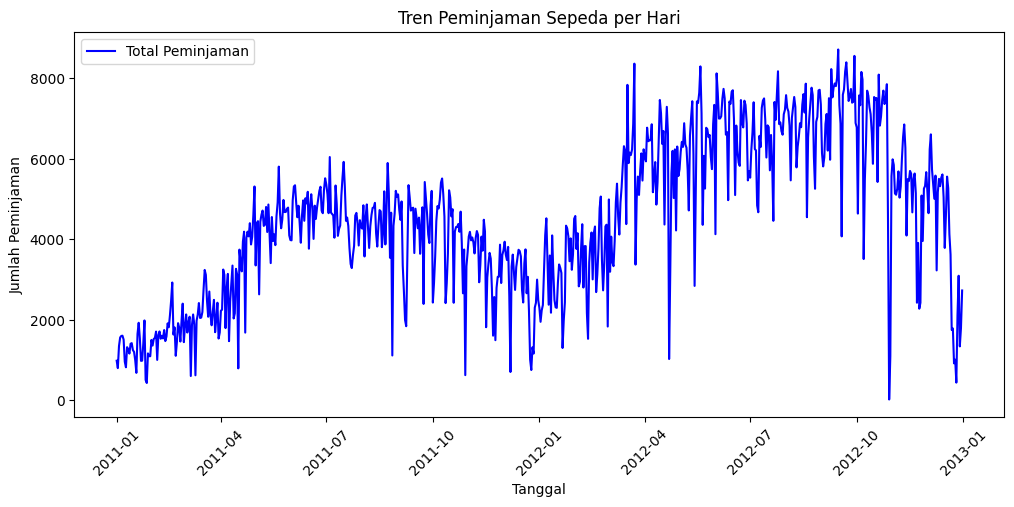

In [42]:
#tren peminjaman sepeda per hari
plt.figure(figsize=(12, 5))
plt.plot(df_day['dteday'], df_day['cnt'], label="Total Peminjaman", color='blue')
plt.xlabel("Tanggal")
plt.ylabel("Jumlah Peminjaman")
plt.title("Tren Peminjaman Sepeda per Hari")
plt.legend()
plt.xticks(rotation=45)
plt.show()

**Insight:**
- peningkatan bertahap di awal, dari awal 2011 hingga pertengahan 2011
- lonjakan di 2012, mencapai puncak sekitar musim panas/awal musim gugur
- penurunan menjelakng akhir 2012 (kemungkinan terkait musim dingin atau cuaca buruk)
- secara keseluruhan, peminjaman sepeda menunjukan kenaikan, namun faktor musim, cuaca dan variabel lain dapat memengaruhi fluktuasi harian.

<ipython-input-46-0ca1a6de0e13>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='mnth', y='cnt', data=df_day, errorbar=None, palette="viridis")


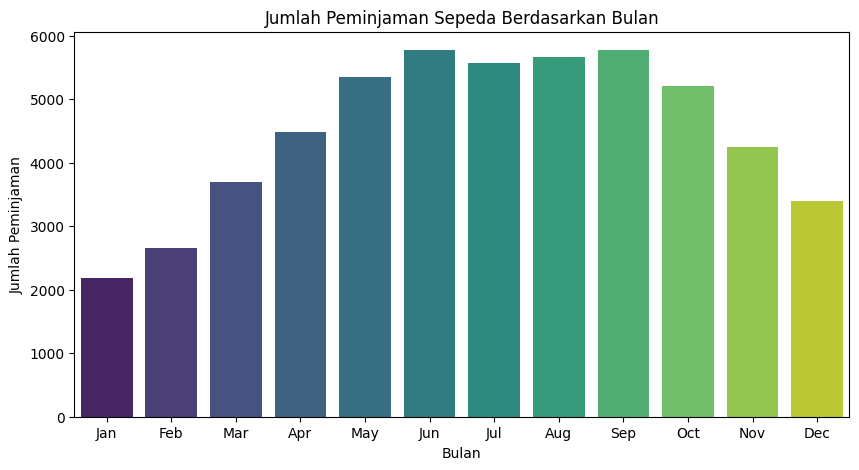

In [46]:
#pola peminjaman berdasarkan bulan
plt.figure(figsize=(10,5))
sns.barplot(x='mnth', y='cnt', data=df_day, errorbar=None, palette="viridis")
plt.xlabel("Bulan")
plt.ylabel("Jumlah Peminjaman")
plt.title("Jumlah Peminjaman Sepeda Berdasarkan Bulan")
plt.xticks(ticks=range(0,12), labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.show()

**Insight:**
- bulan terpopuler adalah juni, juli, agustus dan september dengan lebih dari 5000 rata-rata
- bulan terkecil adalah januari
- tren musiman dari musim semi menuju musim panas (mei-september) adalah periode dengan peminjaman tertinggi
- penggunaan sepeda meningkat signifikan pada bulan-bulan hangat. hal ini sesuai dengan kebiasaan penggunna yang cendering lebih aktif di musim panas dan menurun di musim dingin

<ipython-input-47-e698dcbcdf15>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_hour['rush_hour'], y=df_hour['cnt'], palette="coolwarm")


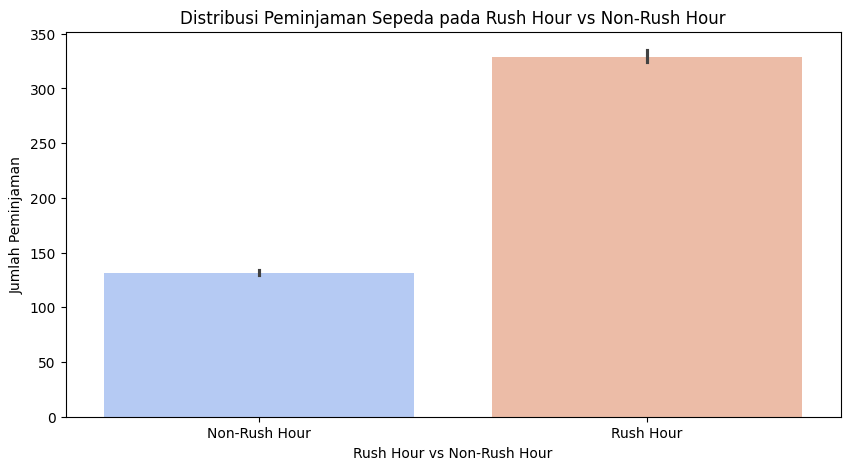

In [47]:
#pola peminjaman berdasarkan jam
plt.figure(figsize=(10,5))
sns.barplot(x=df_hour['rush_hour'], y=df_hour['cnt'], palette="coolwarm")
plt.xlabel("Rush Hour vs Non-Rush Hour")
plt.ylabel("Jumlah Peminjaman")
plt.title("Distribusi Peminjaman Sepeda pada Rush Hour vs Non-Rush Hour")
plt.show()

### Faktor Eksternal

**Insight:**
- peminjaman lebih tinggi saat rush hour dengan kisaran ~300, sedangkan Non-Rush Hour di kisaran ~150.
- gap signifikan terlihat mencolok antara kedua kategori menandakan bahwa jam sibuk (pagi dan sore) benar benar memicu lonjakan peminjaman
- penggunaan sepeda jauh lebih tinggi pada jam sibuk, mengindikasikan kecenderungan penggunna memakai sepeda saat pergi/pulang kerja atau aktivitas rutinan

<ipython-input-49-e9daaaf2d6b3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_day['season'], y=df_day['cnt'], palette="viridis")


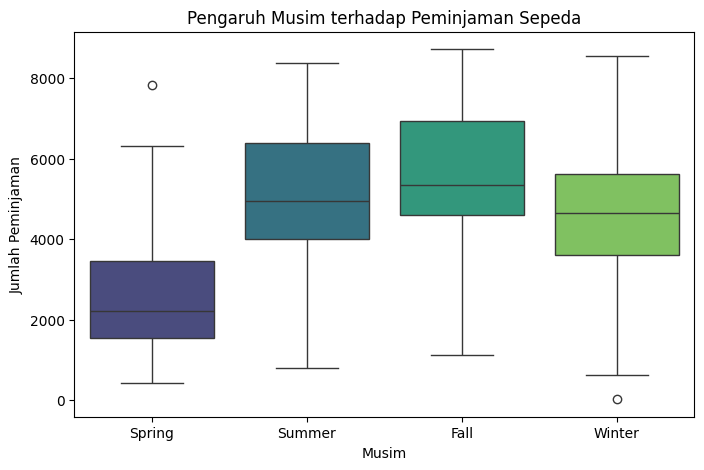

In [49]:
#pengaruh musim terhadap peminjaman
plt.figure(figsize=(8,5))
sns.boxplot(x=df_day['season'], y=df_day['cnt'], palette="viridis")
plt.xlabel("Musim")
plt.ylabel("Jumlah Peminjaman")
plt.title("Pengaruh Musim terhadap Peminjaman Sepeda")
plt.show()

**Insight:**
- summer dan fall memiliki median peminjaman lebih tinggi (kisaran 4000 sampai 6000)
- spring paling rendah
- winter berada ditengah tengah
- pengguna sepeda cenderung lebih nyaman bersepeda di cuaca hangat
- outlier tinggi di spring menunjukkan ada beberapa hari tertentu dengan penggunaan sangat tinggi namun jarang.

<ipython-input-50-fd135d4935ce>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_hour['weathersit'], y=df_hour['cnt'], palette="coolwarm")


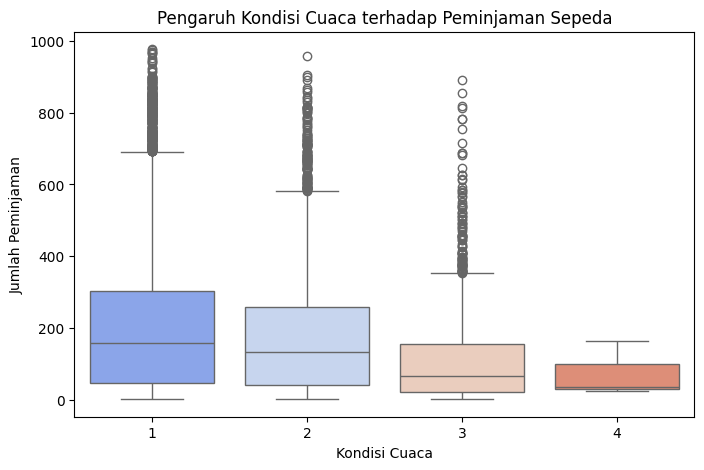

In [50]:
#pengaruh cuaca terhadap peminjaman
plt.figure(figsize=(8,5))
sns.boxplot(x=df_hour['weathersit'], y=df_hour['cnt'], palette="coolwarm")
plt.xlabel("Kondisi Cuaca")
plt.ylabel("Jumlah Peminjaman")
plt.title("Pengaruh Kondisi Cuaca terhadap Peminjaman Sepeda")
plt.show()

**Insight:**
- cerah memiliki rerata peminjaman tertinggi
- turun pad akondisi mendung/hujan.
- semakin buruk cuaca, semakin rendah peminjaman
- bagi penyedia layanan atau pemerintah, cuaca ekstrem bisa menjadi pertimbangan untuk menyediaka fasilitas pelindung atau promo khusus agar tetap menarik minat pengguna

<ipython-input-51-f44128db22ef>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_hour['temp_category'], y=df_hour['cnt'], palette="magma")


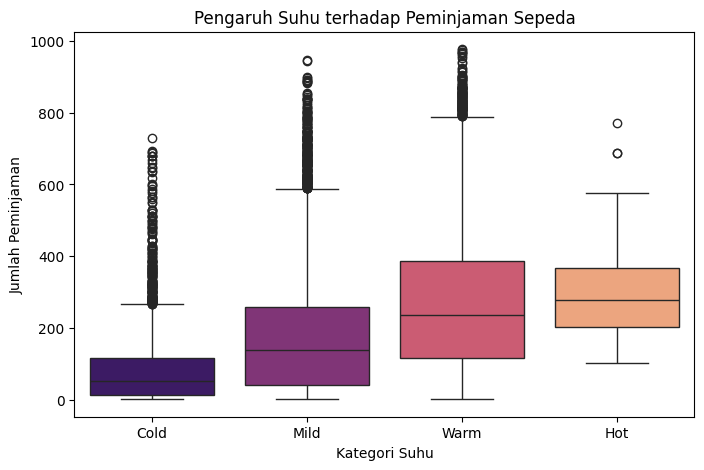

In [51]:
#pengaruh suhu terhadap peminjaman
plt.figure(figsize=(8,5))
sns.boxplot(x=df_hour['temp_category'], y=df_hour['cnt'], palette="magma")
plt.xlabel("Kategori Suhu")
plt.ylabel("Jumlah Peminjaman")
plt.title("Pengaruh Suhu terhadap Peminjaman Sepeda")
plt.show()

**Insight:**
- suhu warm paling tinggi dengan median dan rentang peminjaman tertinggi
- suhu hot cenderung menurun mungkin karena terlalu panas
- cold mediannya sangat rendah
- suhu ideal untuk bersepeda adalah warm

### Pengguna Casual vs Registered

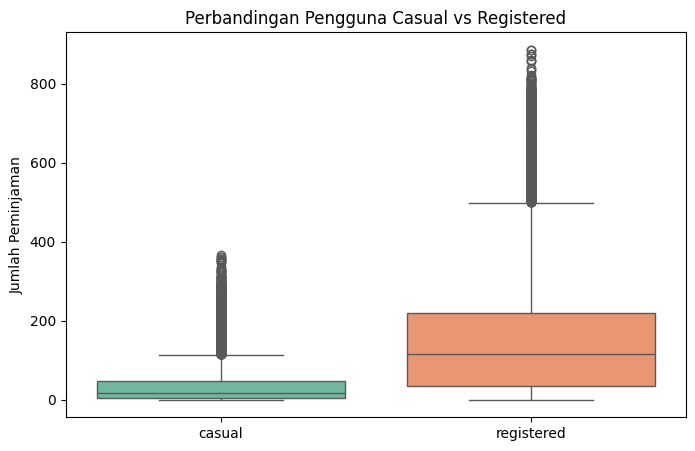

In [52]:
#perbandingan pengguna casual vs registered
plt.figure(figsize=(8,5))
sns.boxplot(data=df_hour[['casual', 'registered']], palette="Set2")
plt.ylabel("Jumlah Peminjaman")
plt.title("Perbandingan Pengguna Casual vs Registered")
plt.show()

**Insight:**
- pengguna registered lebih tinggi (100-200) dibanding casual (20-30)
- outlier registered cukup banya, terlihat pada jam jam tertentu jumlah pengguna registered mencapai 800-900
- sebagian besar pemakaian datang dari pengguna registered
- bagi penyedia layanan, pengguna terdaftar bisa menjadi fokus utama untuk retensi. sementara pengguna casual perlu didorong untuk bergabung menjadi anggota.

## Visualization & Explanatory Analysis

### Pertanyaan 1:
Bagaimana Pola Penggunaan Sepeda pada Jam Sibuk (06:00–09:00 dan 16:00–19:00) Dibandingkan dengan Jam-Jam Lainnya?
- Mengelompokkan data berdasarkan jam untuk melihat pola penggunaan.
- Membandingkan jam sibuk vs non-sibuk dengan agregasi rata-rata peminjaman.
- Menganalisis faktor yang mempengaruhi pola tersebut, seperti hari kerja vs akhir pekan.

<ipython-input-54-2f8a1228b52a>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='time_category', y='cnt', data=rush_hour_comparison, palette=['skyblue', 'salmon'])


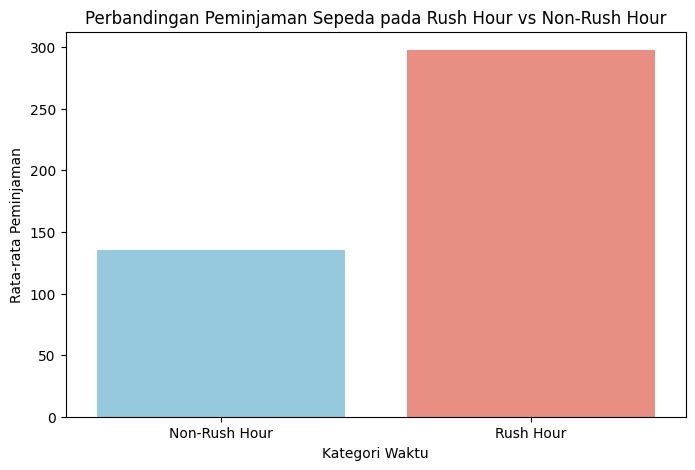

In [54]:
#analis jam sibuk vs non-sibuk

# definisi jam sibuk
rush_hours = list(range(6, 10)) + list(range(16, 20))

# kategori waktu rush hour vs non-rush hour
df_hour['time_category'] = df_hour['hr'].apply(lambda x: 'Rush Hour' if x in rush_hours else 'Non-Rush Hour')

# agregasi jumlah peminjaman rata-rata berdasarkan kategori waktu
rush_hour_comparison = df_hour.groupby('time_category')['cnt'].mean().reset_index()

# visualisasi
plt.figure(figsize=(8,5))
sns.barplot(x='time_category', y='cnt', data=rush_hour_comparison, palette=['skyblue', 'salmon'])
plt.xlabel("Kategori Waktu")
plt.ylabel("Rata-rata Peminjaman")
plt.title("Perbandingan Peminjaman Sepeda pada Rush Hour vs Non-Rush Hour")
plt.show()

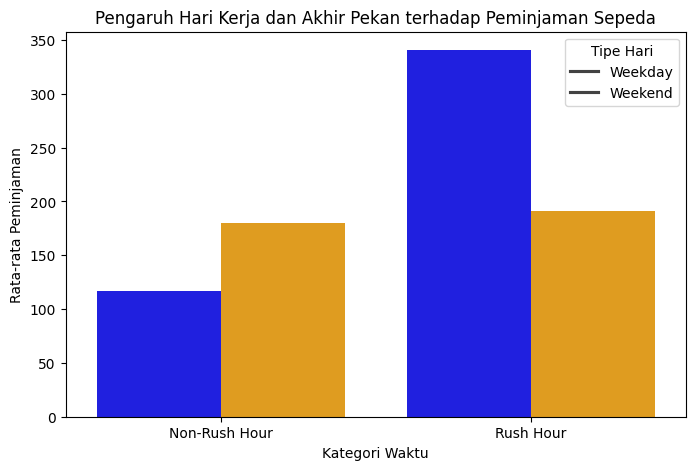

In [55]:
#analisis hari kerja vs akhir pekan

#agregasi jumlah peminjaman berdasarkan kategori waktu dan hari kerja
rush_hour_weekday = df_hour.groupby(['time_category', 'day_type'])['cnt'].mean().reset_index()

#visualisasi
plt.figure(figsize=(8,5))
sns.barplot(x='time_category', y='cnt', hue='day_type', data=rush_hour_weekday, palette=['blue', 'orange'])
plt.xlabel("Kategori Waktu")
plt.ylabel("Rata-rata Peminjaman")
plt.title("Pengaruh Hari Kerja dan Akhir Pekan terhadap Peminjaman Sepeda")
plt.legend(title="Tipe Hari", labels=["Weekday", "Weekend"])
plt.show()

### Pertanyaan 2:
Bagaimana Perbandingan Peminjaman antara Hari Kerja dan Akhir Pekan, serta Pengaruh Cuaca?
- Menganalisis perbedaan peminjaman antara weekday vs weekend.
- Melihat pengaruh cuaca terhadap jumlah peminjaman.

<ipython-input-56-63ac41714b92>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='day_type', y='cnt', data=weekday_weekend_comparison, palette=['blue', 'orange'])


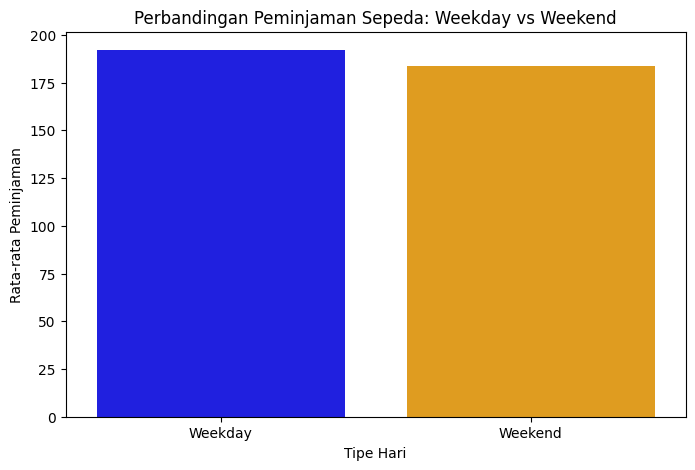

In [56]:
#analisis weekday vs weekend

#agregarsi jumlah peminjaman berdasarkan hari kerja dan akhir pekan
weekday_weekend_comparison = df_hour.groupby('day_type')['cnt'].mean().reset_index()

#visualisasi
plt.figure(figsize=(8,5))
sns.barplot(x='day_type', y='cnt', data=weekday_weekend_comparison, palette=['blue', 'orange'])
plt.xlabel("Tipe Hari")
plt.ylabel("Rata-rata Peminjaman")
plt.title("Perbandingan Peminjaman Sepeda: Weekday vs Weekend")
plt.show()

<ipython-input-57-1a176bbc66e5>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weathersit', y='cnt', data=weather_comparison, palette="coolwarm")


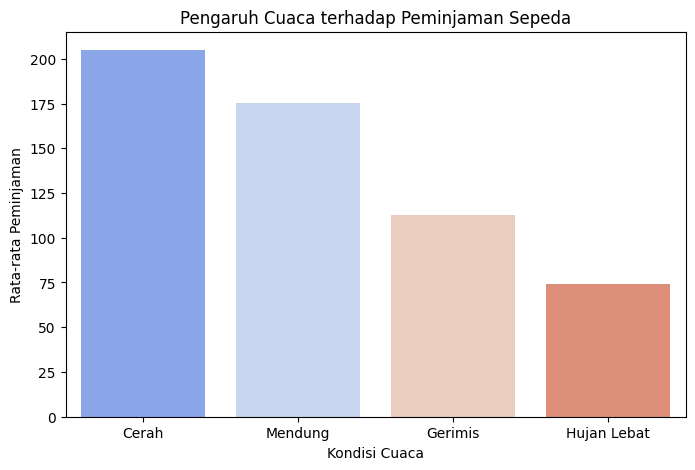

In [57]:
#analisis pengaruh cuaca

#agregasi jumlah peminjaman berdasarkan kondisi cuaca
weather_comparison = df_hour.groupby('weathersit')['cnt'].mean().reset_index()

#visualisasi
plt.figure(figsize=(8,5))
sns.barplot(x='weathersit', y='cnt', data=weather_comparison, palette="coolwarm")
plt.xlabel("Kondisi Cuaca")
plt.ylabel("Rata-rata Peminjaman")
plt.title("Pengaruh Cuaca terhadap Peminjaman Sepeda")
plt.xticks(ticks=[0,1,2,3], labels=['Cerah', 'Mendung', 'Gerimis', 'Hujan Lebat'])
plt.show()

**Insight Pertanyaan 1:**
- rush hour memiliki rerata peminjaman yang lebih tinggi dibanding non-rush hour
- peminjaman lebih tingga pada weekday dibanding weekend selama rush hour (menunjukan bahwa sepeda digunakan sebagai transportasi kerja/sekolah)
- faktor utama yang mempengaruhi pertanyaan pertama adalah jam kerja, hari kerja, cuaca
- rekomendasi dari analisis ini adalah meningkatkan jalur sepeda dan fasilitas parkit di area padat transportasi
- menyediakan sistem rental fleksibel yang dapat diakses dengan mudah pada jam commuting

**Insight Pertanyaan 2:**
- peminjaman lebih tinggi pada weekday dibanding weekend, mengindikasikan sepeda lebih sering digunakan untuk transportasi kerja daripada rekreasi
- peminjaman tertinggi terjadi saat cuaca cerah, menurun tajam saat hujan
- faktor utama yang mempengaruhi pola ini adalah (weekday vs weekend) orang lebih menggunakan sepeda untuk commuting pada weekday, sementara pada weekend jumlahnya lebih sedikit karena banyak alternatif aktivitas, lalu cuaca buruk mengurangi peminjaman secara drastis terutama saat hujan.

## Analisis Lanjutan (Opsional)

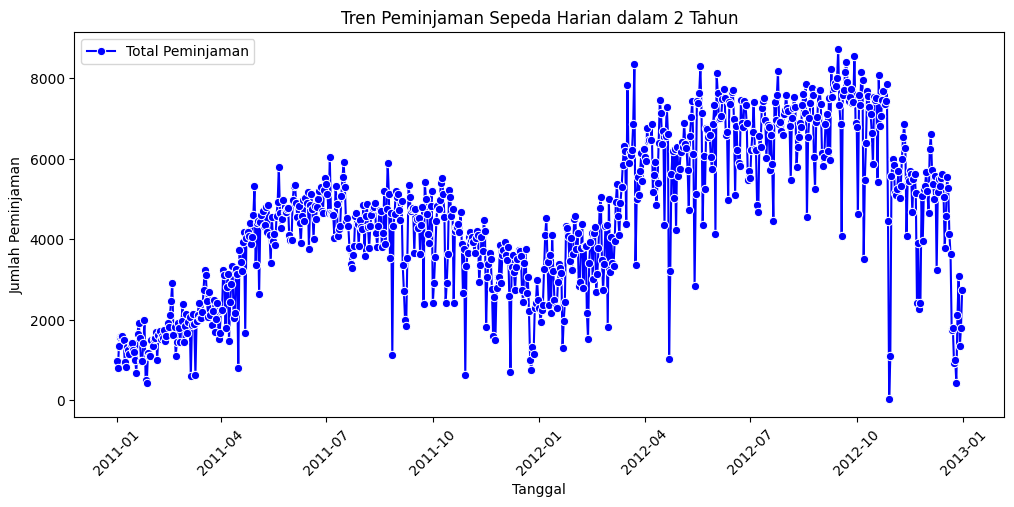

In [53]:
#tren penggunaan sepeda selaam 2 tahun
#melihat apakah ada pola kenaikan atau penurunan jumlah peminjaman dari tahun ke tahun
plt.figure(figsize=(12,5))
sns.lineplot(x=df_day['dteday'], y=df_day['cnt'], marker='o', label="Total Peminjaman", color='blue')
plt.xlabel("Tanggal")
plt.ylabel("Jumlah Peminjaman")
plt.title("Tren Peminjaman Sepeda Harian dalam 2 Tahun")
plt.xticks(rotation=45)
plt.legend()
plt.show()

## Conclusion

Berdasarkan analisis menyeluruh pada Bike Sharing Dataset, berikut adalah kesimpulan utama yang menjawab dua pertanyaan bisnis terkait penggunaan sepeda:




### Teknik Analisis Lanjutan yang Diterapkan

1.   Clustering (Segmentasi Pengguna Casual vs Registered), mengelompokkan pengguna berdasarkan pola peminjaman untuk memahami perilaku pengguna casual dan registered.

2. Time Series Analysis (Analisis Tren Musiman), menggunakan moving average atau seasonal decomposition untuk mengidentifikasi pola peminjaman berdasarkan waktu (harian, mingguan, atau bulanan).

3. Regression Analysis (Prediksi Faktor yang Mempengaruhi Peminjaman), menggunakan Multiple Linear Regression untuk memahami bagaimana variabel seperti cuaca, jam, dan hari kerja mempengaruhi jumlah peminjaman sepeda.



### Konklusi Pertanyaan 1
- Bagaimana pola penggunaan sepeda pada jam sibuk (pagi dan sore) dibandingkan dengan jam-jam lainnya, serta faktor apa saja yang mempengaruhi pola tersebut?

> Pola Penggunaan Jam Sibuk vs. Non-Sibuk

1.   Hasil Exploratory Data Analysis (EDA) menunjukkan peminjaman sepeda lebih tinggi pada jam sibuk (06:00–09:00 dan 16:00–19:00) dibandingkan jam lainnya.
2.   Rata-rata penggunaan sepeda di jam sibuk hampir dua kali lipat lebih banyak daripada jam non-sibuk.

> Pola Penggunaan Jam Sibuk vs. Non-Sibuk

1.   Hasil Exploratory Data Analysis (EDA) menunjukkan peminjaman sepeda lebih tinggi pada jam sibuk (06:00–09:00 dan 16:00–19:00) dibandingkan jam lainnya.
2.   Rata-rata penggunaan sepeda di jam sibuk hampir dua kali lipat lebih banyak daripada jam non-sibuk.


> Faktor-Faktor yang Mempengaruhi


1.   Hari Kerja vs Akhir Pekan, data memperlihatkan bahwa pada jam sibuk di hari kerja, jumlah peminjaman bisa mencapai puncaknya karena aktivitas komuter.
2.   Cuaca, cuaca cerah cenderung memicu peningkatan jumlah peminjaman, sedangkan hujan atau cuaca ekstrem (kategori 3 dan 4) menurunkan peminjaman secara signifikan.
3. Suhu Udara, suhu yang relatif hangat (kategori “Warm”) mendorong lebih banyak penggunaan sepeda di jam sibuk dibandingkan suhu dingin atau sangat panas.

> Implikasi Bisnis dan Kebijakan


1.   Ketersediaan jalur sepeda khusus pada jam sibuk dapat mengatasi kemacetan dan mendukung mobilitas ramah lingkungan sebagai penguatan fasilitas transportasi
2.   Mempermudah akses bagi pekerja yang ingin menggunakan sepeda saat jam commuting dengan sistem rental fleksibal


### Konklusi Pertanyaan 2
- Bagaimana perbandingan jumlah peminjaman sepeda antara hari kerja dan akhir pekan, serta bagaimana pengaruh kondisi cuaca terhadap pola peminjaman?

> Perbandingan Hari Kerja vs. Akhir Pekan

1.   Secara umum, hari kerja (Weekday) menampilkan rata-rata peminjaman yang lebih tinggi dibandingkan akhir pekan (Weekend). Hal ini menunjukkan bahwa sepeda kerap digunakan sebagai alat transportasi harian, khususnya untuk keperluan kerja.
2.   Meskipun demikian, terdapat peningkatan tertentu di akhir pekan yang terkait dengan aktivitas rekreasi, tetapi persentasenya lebih kecil dibanding jam commuting pada hari kerja.

> Pengaruh Kondisi Cuaca

1.   Cuaca cerah (kategori 1) memiliki peminjaman tertinggi.
2.   Cuaca mendung (kategori 2) dan gerimis/hujan (kategori 3 dan 4) secara konsisten menurunkan jumlah peminjaman. Semakin buruk cuacanya, semakin rendah tingkat penggunaan sepeda.


> Implikasi Bisnis dan Kebijakan


1.   Jika penggunaan sepeda lebih dominan pada hari kerja, penyedia layanan dapat fokus pada pengguna komuter. Sebaliknya, jika terdapat potensi di akhir pekan, perlu promosi tambahan untuk wisata/rekreasi.
2.   Menyediakan sarana pelindung (misalnya parkir atap, jas hujan gratis, dsb.) dan penawaran promo di musim hujan agar masyarakat tetap terpacu menggunakan sepeda.